RFM - CSV.C
The reference time period is a solar year starting from 01-01-2021 to 31/12/2021






Database inspection

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime as dt
from sklearn.cluster import KMeans

In [42]:
df= pd.read_csv("/home/zairafalco/Downloads/rfm_c_2020_01_01.csv",sep=";")
df.head(11)

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,dt_min,dt_max,t_days_op
0,8707226,323,1,5.90,5.90,5.90,5.900000,NaN,2020-02-13,2020-02-13,0
1,8707227,54,3,27.86,4.90,15.09,9.286667,5.240633,2020-01-04,2020-11-08,309
2,8707229,27,7,162.98,7.53,50.88,23.282857,16.776008,2020-01-03,2020-12-05,337
3,8707231,193,2,42.83,7.76,35.07,21.415000,19.311086,2020-06-22,2020-06-22,0
4,8707234,75,1,38.67,38.67,38.67,38.670000,NaN,2020-10-18,2020-10-18,0
5,8707240,2,36,1155.84,3.30,51.14,32.106667,9.299158,2020-01-17,2020-12-30,348
6,8707246,2,20,567.72,2.90,60.59,28.386000,17.390815,2020-01-13,2020-12-30,352
7,8707247,2,24,552.26,3.80,49.06,23.010833,10.334128,2020-01-14,2020-12-30,351
8,8707248,16,9,377.77,4.75,104.32,41.974444,30.138471,2020-01-11,2020-12-16,340
9,8707249,41,6,80.64,4.33,19.93,13.440000,5.682939,2020-01-20,2020-11-21,306


Database inspection

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279908 entries, 0 to 279907
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   codice_cliente  279908 non-null  int64  
 1   recency         279908 non-null  int64  
 2   frequency       279908 non-null  int64  
 3   monetary        279908 non-null  float64
 4   tmin            279908 non-null  float64
 5   tmax            279908 non-null  float64
 6   tmed            279908 non-null  float64
 7   tdev            241919 non-null  float64
 8   dt_min          279908 non-null  object 
 9   dt_max          279908 non-null  object 
 10  t_days_op       279908 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 23.5+ MB


In [44]:
df.head(7)

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,dt_min,dt_max,t_days_op
0,8707226,323,1,5.90,5.90,5.90,5.900000,NaN,2020-02-13,2020-02-13,0
1,8707227,54,3,27.86,4.90,15.09,9.286667,5.240633,2020-01-04,2020-11-08,309
2,8707229,27,7,162.98,7.53,50.88,23.282857,16.776008,2020-01-03,2020-12-05,337
3,8707231,193,2,42.83,7.76,35.07,21.415000,19.311086,2020-06-22,2020-06-22,0
4,8707234,75,1,38.67,38.67,38.67,38.670000,NaN,2020-10-18,2020-10-18,0
5,8707240,2,36,1155.84,3.30,51.14,32.106667,9.299158,2020-01-17,2020-12-30,348
6,8707246,2,20,567.72,2.90,60.59,28.386000,17.390815,2020-01-13,2020-12-30,352


In [45]:
df.describe()

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,t_days_op
count,2.799080e+05,279908.000000,279908.000000,279908.000000,279908.000000,279908.000000,279908.000000,241919.000000,279908.000000
mean,9.021288e+06,76.491851,21.340833,548.430097,10.833629,60.324611,27.541538,17.164971,216.404133
std,1.879093e+05,99.631143,62.858901,1922.142337,16.914699,49.435416,21.831649,13.947334,138.922516
min,8.707226e+06,1.000000,1.000000,0.010000,-47.790000,0.010000,0.010000,0.000000,0.000000
25%,8.860849e+06,5.000000,3.000000,62.150000,2.750000,26.120000,13.734894,8.126134,66.000000
50%,9.010658e+06,27.000000,9.000000,209.735000,5.550000,47.980000,21.690000,13.697123,275.000000
75%,9.185099e+06,116.000000,25.000000,631.795000,11.610000,80.860000,34.365511,22.107309,345.000000
max,9.381887e+06,365.000000,8525.000000,250191.930000,600.240000,2145.370000,600.240000,489.093986,364.000000


Dataframe straucture

The dataframe is 725862 by 11 and contains the following parameters:
    Codice_cliente: unique client identifier\
    recency: Number of days since last purchase\
    frequency: number of time the client visited the store\
    monetary: total amount of money spent in the reference time period\
    tmin: minimum amount of money spent by the client\
    tmax: maximum spent by the client\
    tmed: average money spent\
    tdev: standardc deviation of tmed\
    dt_min: first day the client visited the store in the reference period\
    dt_max: last day the client visited the store\
    t_days_op: differnece between the first day of visit and the last one\

    

In [46]:
#check for the missing values 

total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_df.head(10)

,Total,Percent
tdev,37989,0.13572
codice_cliente,0,0.00000
recency,0,0.00000
frequency,0,0.00000
monetary,0,0.00000
tmin,0,0.00000
tmax,0,0.00000
tmed,0,0.00000
dt_min,0,0.00000
dt_max,0,0.00000


Before applying any machine learning technique has to unskew the variables.
Some value of Quantity is in negative.

In [47]:
# There are negative quantities and corresponding Invoice no is started with string C (Cancelled items)

display(df.sort_values('tdev')[:11])

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,dt_min,dt_max,t_days_op
185290,9127091,226,2,27.96,13.98,13.98,13.98,0.0,2020-05-19,2020-05-20,1
213141,9192737,328,2,12.00,6.00,6.00,6.00,0.0,2020-02-05,2020-02-08,3
18562,8747836,109,3,9.00,3.00,3.00,3.00,0.0,2020-09-04,2020-09-14,10
35333,8784130,314,2,5.38,2.69,2.69,2.69,0.0,2020-02-13,2020-02-22,9
142682,9018394,196,2,15.00,7.50,7.50,7.50,0.0,2020-06-18,2020-06-19,1
259843,9316531,167,2,5.94,2.97,2.97,2.97,0.0,2020-07-14,2020-07-18,4
34304,8781676,49,2,3.38,1.69,1.69,1.69,0.0,2020-11-13,2020-11-13,0
238753,9240940,141,3,69.36,23.12,23.12,23.12,0.0,2020-08-06,2020-08-13,7
268252,9334876,362,2,12.00,6.00,6.00,6.00,0.0,2020-01-03,2020-01-05,2
263273,9323959,298,3,22.50,7.50,7.50,7.50,0.0,2020-03-04,2020-03-09,5


In [48]:
df=df.drop_duplicates()
df.shape

(279908, 11)

In [49]:
df.isnull().sum().sort_values(ascending=False)

tdev              37989
codice_cliente        0
recency               0
frequency             0
monetary              0
tmin                  0
tmax                  0
tmed                  0
dt_min                0
dt_max                0
t_days_op             0
dtype: int64

In [50]:
df.dtypes

codice_cliente      int64
recency             int64
frequency           int64
monetary          float64
tmin              float64
tmax              float64
tmed              float64
tdev              float64
dt_min             object
dt_max             object
t_days_op           int64
dtype: object

In [51]:
# Convert date from string to datetime
df['dt_min']= pd.to_datetime(df['dt_min'])
df['dt_max']= pd.to_datetime(df['dt_max'])
# (df.dt_max.max() - df.dt_min.min()).days ## 364 days from 01/01/2021 to 31/12/2021

In [52]:
df.t_days_op.max()

364

In [53]:
df.dt_min.max()

Timestamp('2020-12-31 00:00:00')

In [54]:
df.dt_max.max()

Timestamp('2020-12-31 00:00:00')

Calculate the score
We need to assign a score from 1 to 5 to recency, frequency and monetary value individually for each customer.

Below is the conversion of columns into rfm scores between 1 to 5.

'5' being the highest and '1' being the least.

The higher the monetary value, higher is the score ie,'5' .
Smaller value of recency indicates recent purchases, so it takes the higher value of 5.
Frequency is the same as monetary, higher the frequency, higher the score.

In [55]:
df["recency_score"] = pd.qcut(df['recency'], 5, labels=[5, 4, 3, 2, 1])


df["frequency_score"] = pd.qcut(df['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

df["monetary_score"] = pd.qcut(df['monetary'], 5, labels=[1, 2, 3, 4, 5])

df['score']=df['recency_score'].astype(int)+df['frequency_score'].astype(int)+df['monetary_score'].astype(int)

In [56]:
df.head()

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,dt_min,dt_max,t_days_op,recency_score,frequency_score,monetary_score,score
0,8707226,323,1,5.90,5.90,5.90,5.900000,NaN,2020-02-13,2020-02-13,0,1,1,1,3
1,8707227,54,3,27.86,4.90,15.09,9.286667,5.240633,2020-01-04,2020-11-08,309,2,2,1,5
2,8707229,27,7,162.98,7.53,50.88,23.282857,16.776008,2020-01-03,2020-12-05,337,3,3,3,9
3,8707231,193,2,42.83,7.76,35.07,21.415000,19.311086,2020-06-22,2020-06-22,0,1,1,1,3
4,8707234,75,1,38.67,38.67,38.67,38.670000,NaN,2020-10-18,2020-10-18,0,2,1,1,4


In [57]:
df[df['score']== 15].sort_values('monetary', ascending=False).head()

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,dt_min,dt_max,t_days_op,recency_score,frequency_score,monetary_score,score
183449,9123760,3,6398,200901.00,0.10,308.59,31.400594,31.297401,2020-01-07,2020-12-29,357,5,5,5,15
175111,9102694,1,6538,153747.11,-0.90,223.68,23.515924,23.235994,2020-01-10,2020-12-31,356,5,5,5,15
122083,8967954,2,3417,127565.86,0.01,326.12,37.332707,35.951087,2020-01-02,2020-12-30,363,5,5,5,15
181269,9116404,1,1695,101561.27,0.17,668.83,59.918153,64.580102,2020-01-02,2020-12-31,364,5,5,5,15
182893,9121069,2,3208,77354.46,0.01,259.80,24.112986,22.078015,2020-01-02,2020-12-30,363,5,5,5,15


Best customers
Usimg score, so we will be able to identify the best customers.

The customers having a score of '15' are considered as the 'best customers' as they have have the highest recency, frequency and monetary score.



Number pf best costumers

In [58]:
df[df['score']==15].count()

codice_cliente     25414
recency            25414
frequency          25414
monetary           25414
tmin               25414
tmax               25414
tmed               25414
tdev               25414
dt_min             25414
dt_max             25414
t_days_op          25414
recency_score      25414
frequency_score    25414
monetary_score     25414
score              25414
dtype: int64

There are 25424 Best customers in the company who are frequent buyers and also generate high revenue.

RFM Clustering
We are going to apply unsupervised machine learning to identify different groups/clusters based on segmentation of customers according to their purchasing behaviour.

The overall clusters will be based on the 3 factors - recency, frequency and monetary values

Looking at the RFM data

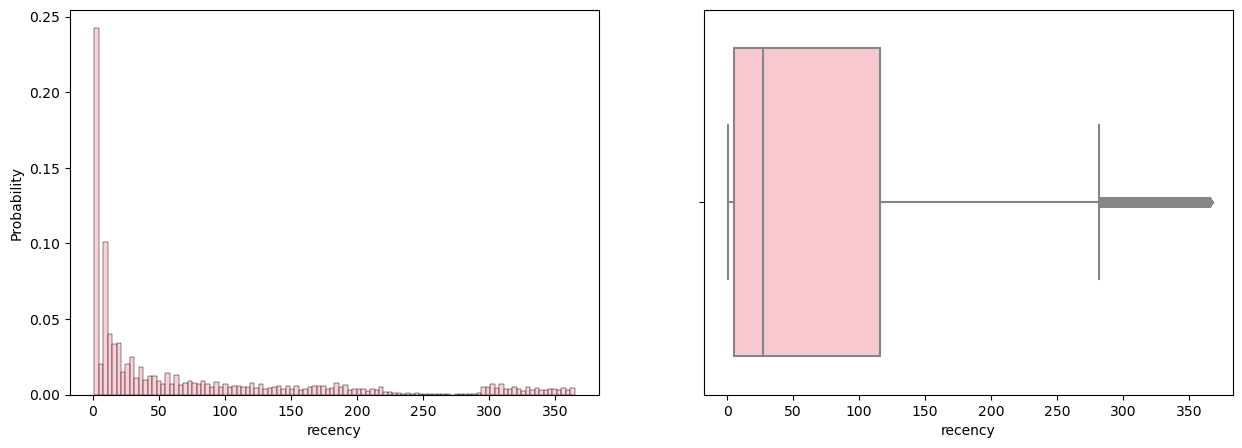

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.histplot(ax=ax1, x=df.recency, stat='probability', color='pink')
sns.boxplot(ax=ax2, x=df.recency, color='pink')
plt.show()
plt.close()

In [60]:
df.columns

Index(['codice_cliente', 'recency', 'frequency', 'monetary', 'tmin', 'tmax',
       'tmed', 'tdev', 'dt_min', 'dt_max', 't_days_op', 'recency_score',
       'frequency_score', 'monetary_score', 'score'],
      dtype='object')

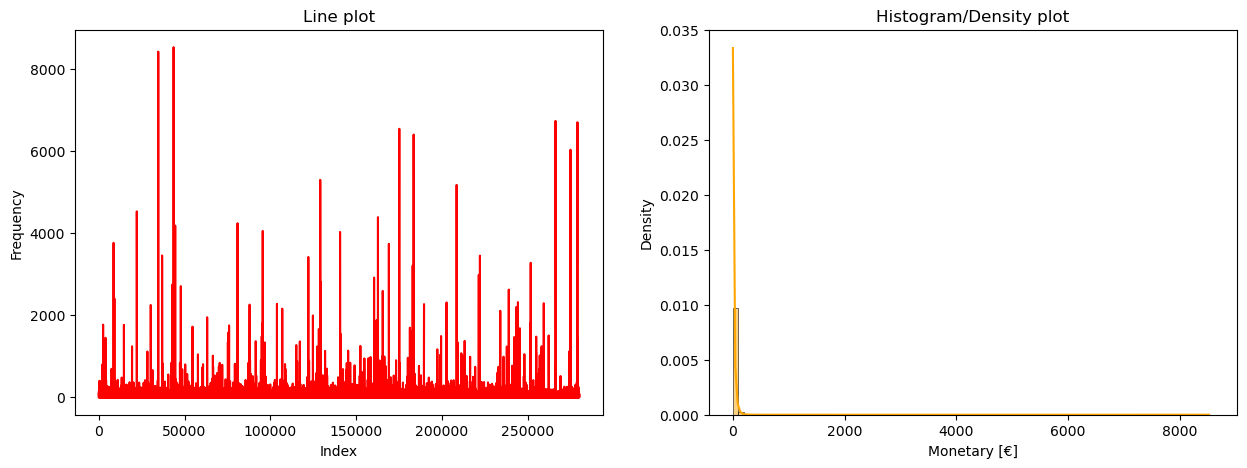

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.plot(df['frequency'], color='red')
ax1.set(xlabel='Index', ylabel="Frequency")
ax1.set_title('Line plot')

sns.histplot(ax=ax2, x=df['frequency'], kde=True, stat="density", binwidth=100, color='orange')
ax2.set(xlabel='Monetary [€]', ylabel="Density")
ax2.set_title('Histogram/Density plot')
plt.show()

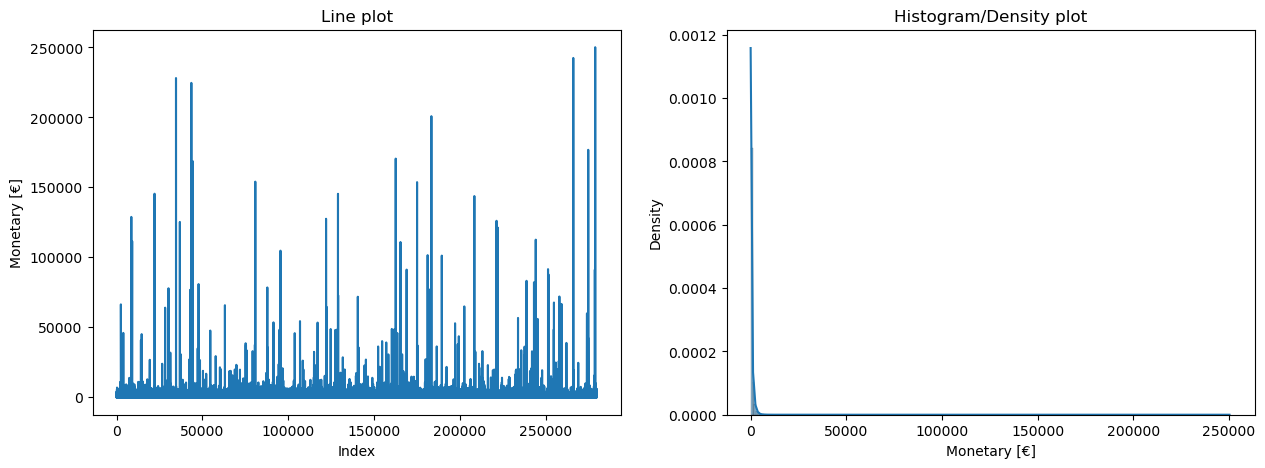

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.plot(df['monetary'])
ax1.set(xlabel='Index', ylabel="Monetary [€]")
ax1.set_title('Line plot')

sns.histplot(ax=ax2, x=df['monetary'], kde=True, stat="density", binwidth=1000)
ax2.set(xlabel='Monetary [€]', ylabel="Density")
ax2.set_title('Histogram/Density plot')
plt.show()

I exclude 1 percent of monetary from the df otherwise I would throw away customers and not outliers.


I take off the top 1 percent and then score customers with effective frequency.



In [63]:
#QTL = 99
#df = df[ (df['monetary'] < np.percentile(df.monetary, QTL))]


In [64]:
df['t_days_op'] = df['t_days_op'] + 1 

df = df.assign(freq_day = df['frequency']/ df['t_days_op'])
df= df[df['freq_day'] <= 1.1]

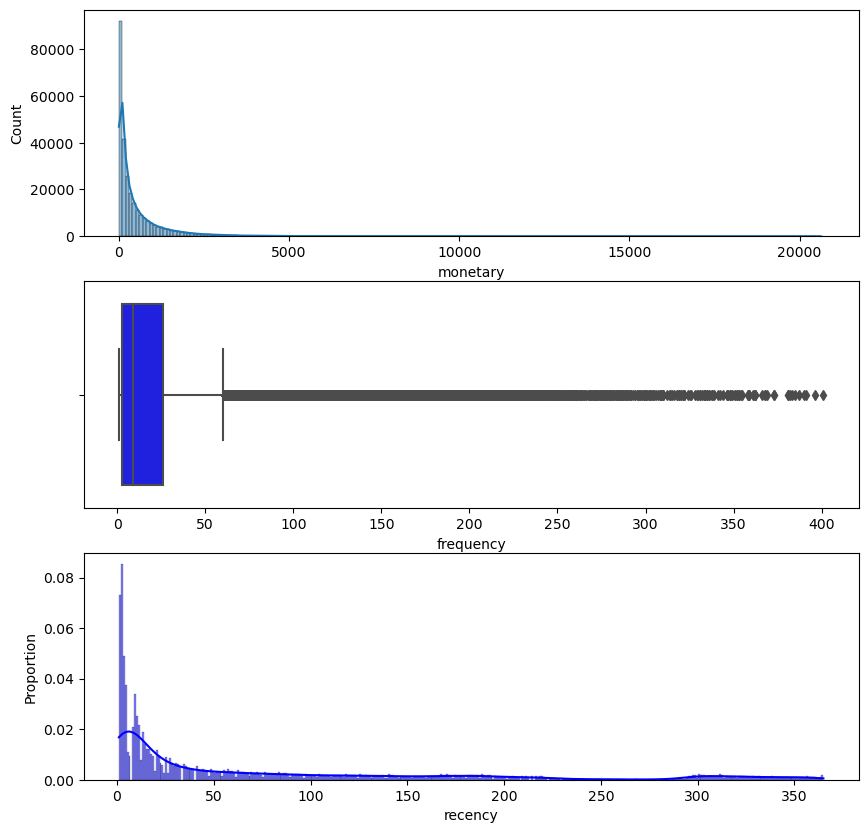

In [65]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
sns.histplot(ax=axes[0], x=df['monetary'],
            kde=True,
            binwidth = 100)

sns.boxplot(ax=axes[1], x=df['frequency'], color='blue')

sns.histplot(ax=axes[2], x=df['recency'],
            kde=True,
            binwidth = 1,
            stat='proportion',
            color='blue')
plt.show()
plt.close()

Recency (R)
Recency is the measure of the number of days that have passed since the last purchase.\ Its values are by definition defined in the range 1 to 364.\ 
For this reason, it is not a well suiteed parameter to explore for outlier detection analysis.\ Furthermore its valor in the context of customer segmetation strategy can be questioned due to its simplidistic definition.\
A customers who has visited the store twice in a year, on the first and on the last day of the year, has the same recency of a customer who has gone shopping every day.

There is no negative value in the dataset.

Checking outliers
Outlier treatment for recency

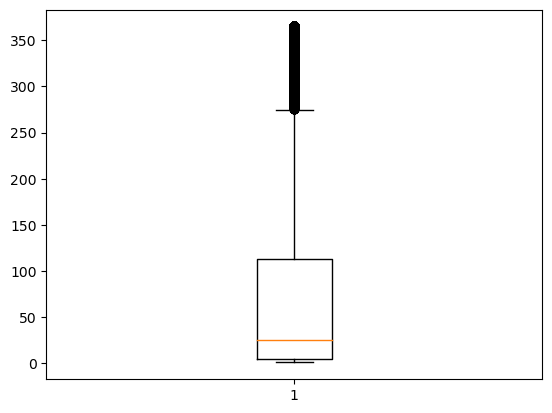

In [66]:
plt.boxplot(df.recency)
Q1 = df.recency.quantile(0.25)
Q3 = df.recency.quantile(0.75)
IQR = Q3 - Q1


Outlier treatment for frequency
Frequency (F)
Frequency is an interesting parameter. It represents the number of times a client has visited the store.\ Unlinke monetary, fruequency is stored as an integer variable. 
It's minimum value is 1 for a clients who only visted the store in the reference time to period to optimally 364 for a very loyal customers who visit the store every single day.
\ The distribution of the parameter is shown in the following figures.\

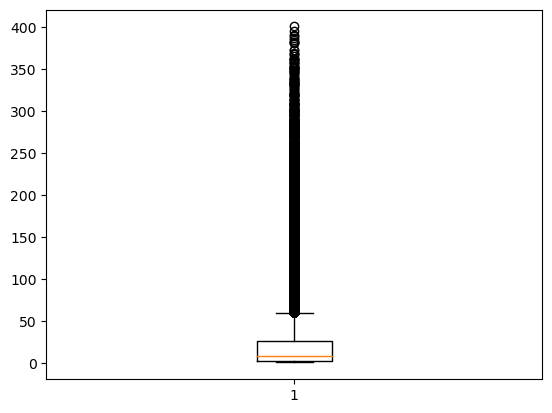

In [67]:
plt.boxplot(df.frequency)
Q1 = df.frequency.quantile(0.25)
Q3 = df.frequency.quantile(0.75)
IQR = Q3 - Q1


Outlier treatment for monetary

Monetary is the the most intuitive parameter.
It's the total amount of money spent by the client in the reference time period. It is stored in the table as a single variable of class float and its distribution and range are shown in the following figures.

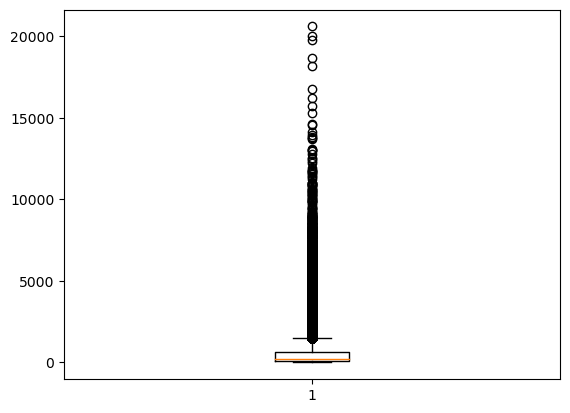

In [68]:
plt.boxplot(df.monetary)
Q1 = df.monetary.quantile(0.25)
Q3 = df.monetary.quantile(0.75)
IQR = Q3 - Q1


Customer segments with RFM Model
The easiest way to create customer segments from the RFM model is to use quartiles.
We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value and one is the lowest/worst value/
RFM - Quantiles = 0.25,0,0,5,0,75

Quintiles (score from 1-5) offer better granularity, ons/

In [69]:
quantiles = df.quantile(q=[0.25,0.5,0.75])
quantiles

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,t_days_op,score,freq_day
0.25,8860652.25,5.0,3.0,63.8600,2.75,26.33,13.765000,8.177656,75.0,6.0,0.035354
0.50,9010387.50,25.0,9.0,214.3450,5.53,48.21,21.731164,13.727351,280.0,9.0,0.075209
0.75,9184713.00,113.0,26.0,637.1875,11.56,81.03,34.412560,22.099417,347.0,12.0,0.187500


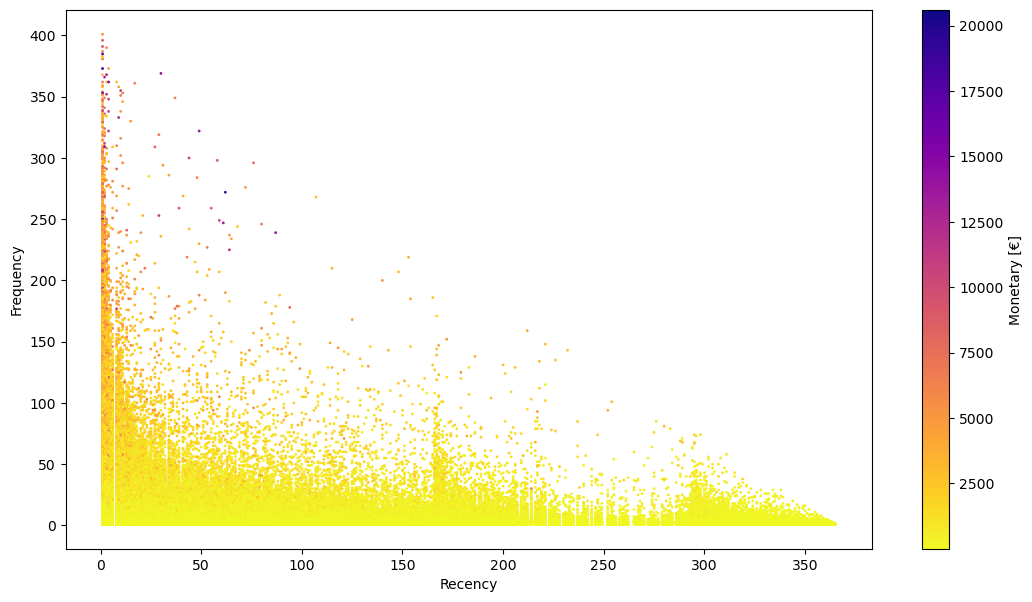

In [70]:
fig, axes = plt.subplots(figsize=(13, 7))
points = axes.scatter( df['recency'], df['frequency'], c=df['monetary'], s=1, cmap='plasma_r')
cbar = fig.colorbar(points,label='Monetary [€]')
axes.set_ylabel("Frequency")
axes.set_xlabel("Recency")
plt.show()
plt.close()

In [71]:
df.describe()

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,t_days_op,score,freq_day
count,2.763580e+05,276358.000000,276358.000000,276358.000000,276358.000000,276358.000000,276358.000000,238369.000000,276358.000000,276358.000000,276358.000000
mean,9.021080e+06,75.067358,20.358915,518.413767,10.830956,60.358052,27.585460,17.169304,219.876168,9.058345,0.223926
std,1.879069e+05,98.473954,29.308493,793.825197,16.963478,48.670617,21.850519,13.839167,137.774434,3.804535,0.329513
min,8.707226e+06,1.000000,1.000000,0.010000,-47.790000,0.010000,0.010000,0.000000,1.000000,3.000000,0.005479
25%,8.860652e+06,5.000000,3.000000,63.860000,2.750000,26.330000,13.765000,8.177656,75.000000,6.000000,0.035354
50%,9.010388e+06,25.000000,9.000000,214.345000,5.530000,48.210000,21.731164,13.727351,280.000000,9.000000,0.075209
75%,9.184713e+06,113.000000,26.000000,637.187500,11.560000,81.030000,34.412560,22.099417,347.000000,12.000000,0.187500
max,9.381887e+06,365.000000,401.000000,20605.170000,600.240000,2022.520000,600.240000,489.093986,365.000000,15.000000,1.100000


K Means
Transforming the data

In [72]:
x = df[['recency', 'monetary','frequency']]
#x['recency'] = x['recency'][stats.zscore(x['recency']) < 3]
#x['frequency'] = x['frequency'][stats.zscore(x['frequency']) < 3]
#x['monetary'] = x['monetary'][stats.zscore(x['monetary']) < 3]
#x = x.dropna()

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as colors



Computing cluster with k=1
Computing cluster with k=2
Computing cluster with k=3
Computing cluster with k=4
Computing cluster with k=5
Computing cluster with k=6


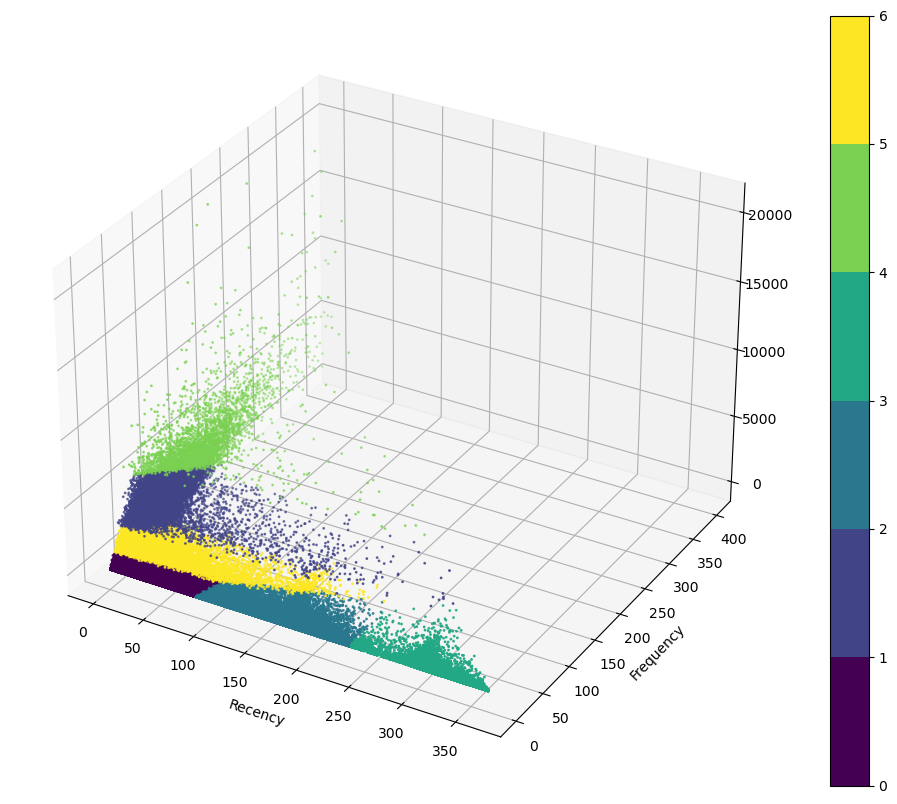

Computing cluster with k=7


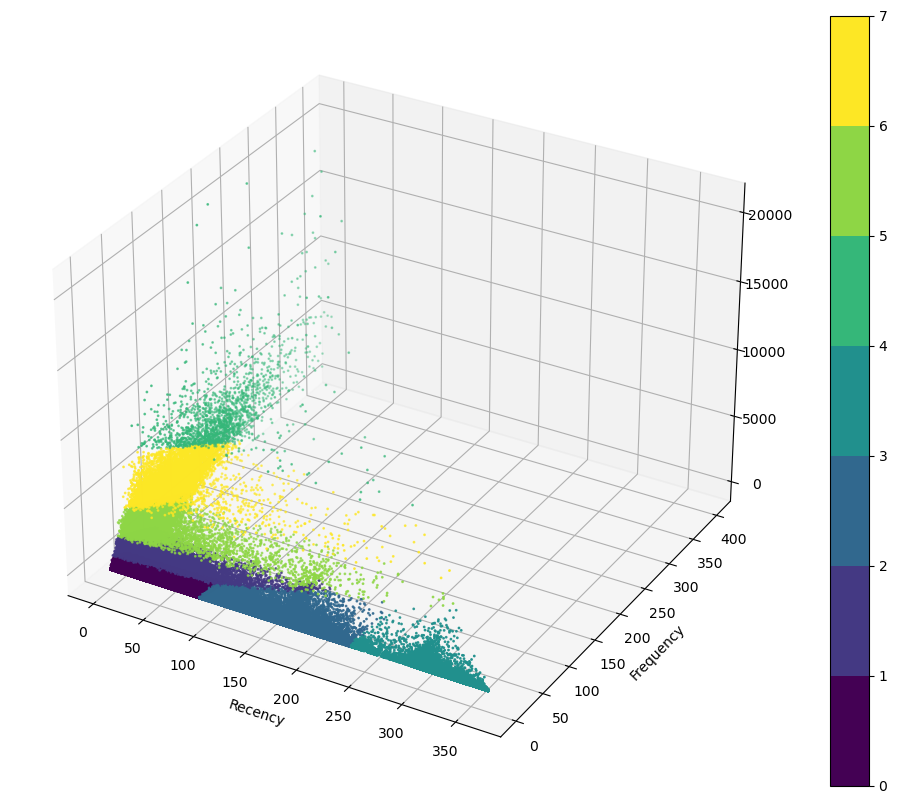

Computing cluster with k=8


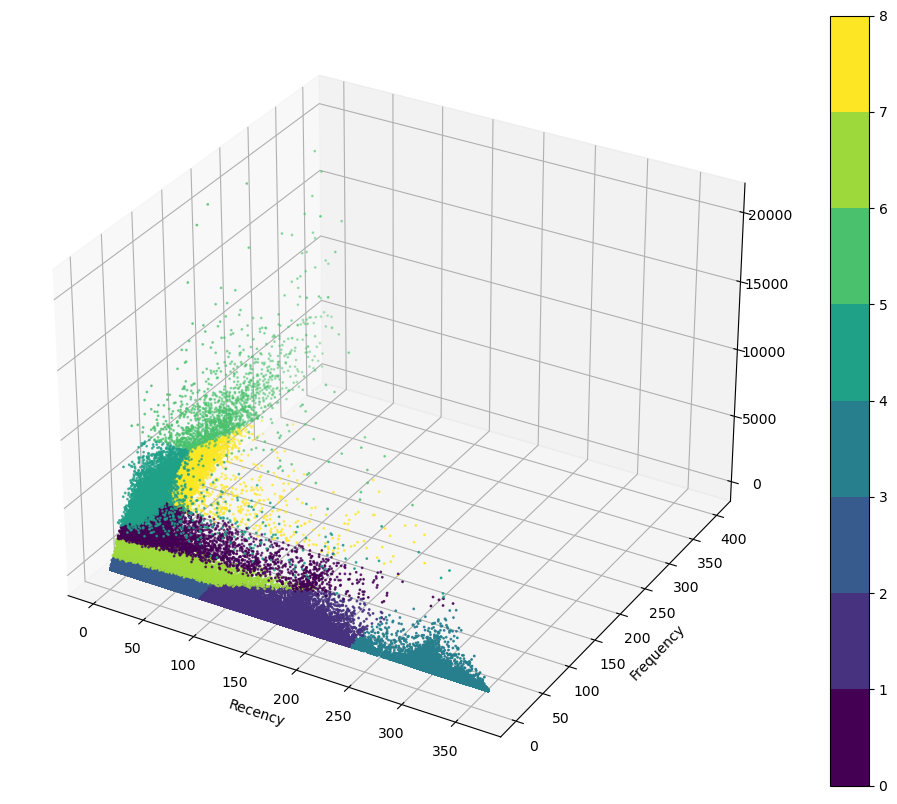

Computing cluster with k=9


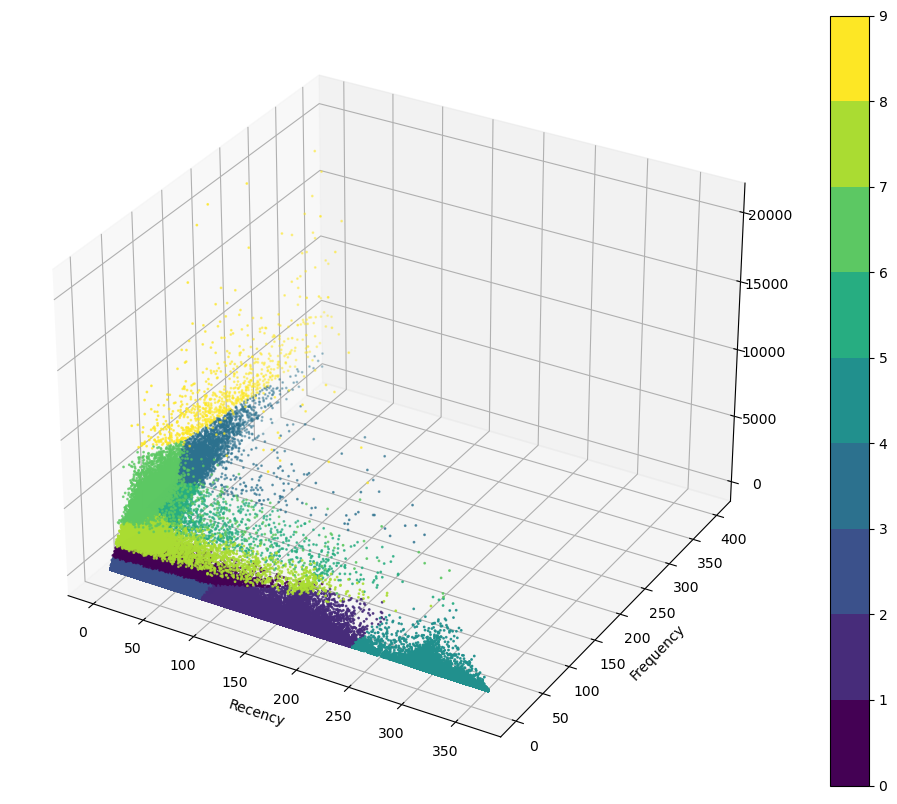

Computing cluster with k=10


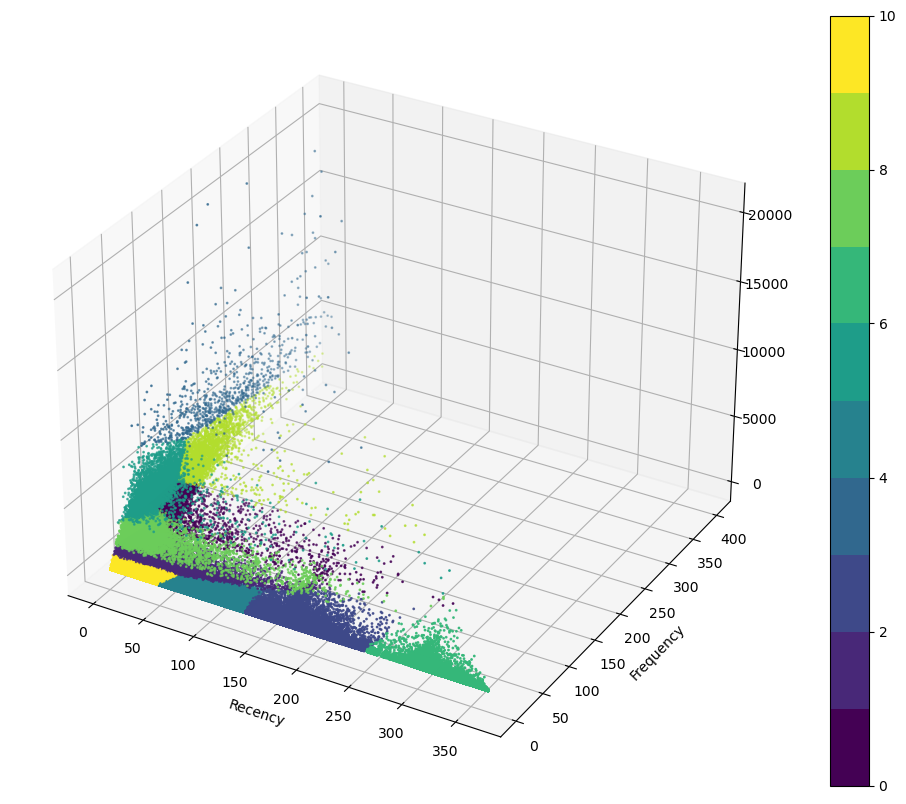

Computing cluster with k=11


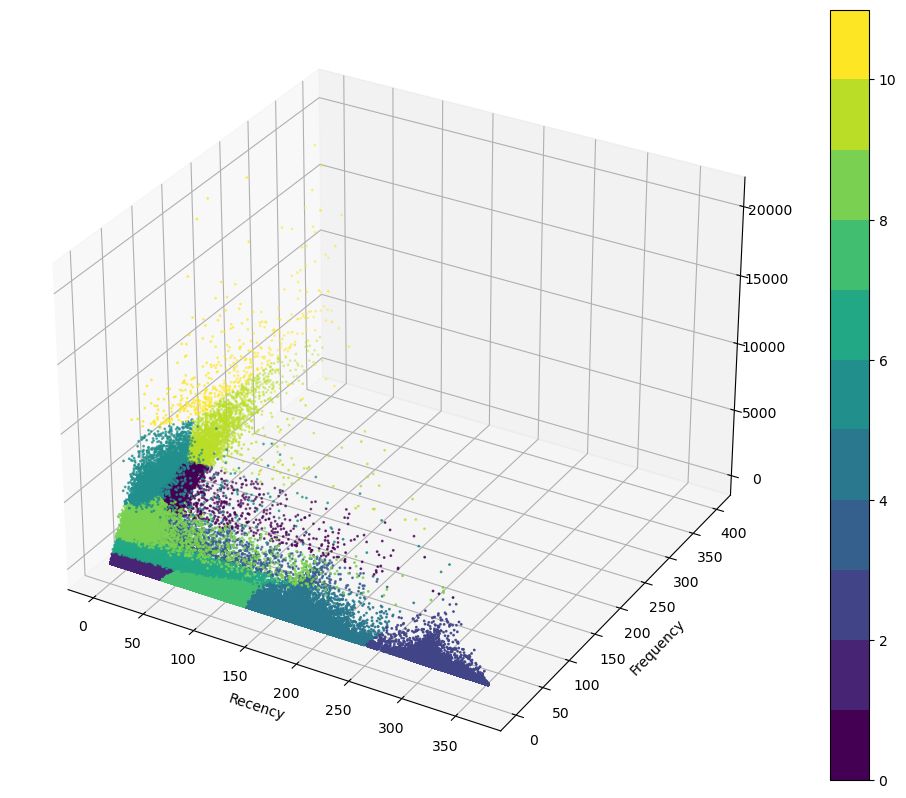

In [74]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

inertia = []
for i in range(1,12):
    print('Computing cluster with k={}'.format(i))
    kmeans = KMeans(n_clusters=i,random_state=1)
    y_pred = kmeans.fit_predict(x)
    inertia.append(kmeans.inertia_)
    if i > 5:
        # 11 clusters division
        fig = plt.figure(figsize=(13,10))
        ax = fig.add_subplot(111, projection = '3d')
        bounds = np.array(range(0,i + 1))
        norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
        # pcm = ax[1].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r')
        points = ax.scatter(df['recency'], df['frequency'], df['monetary'], s=1, c=y_pred, cmap = 'viridis', norm=norm)
        cbar = fig.colorbar(points, orientation='vertical')
        ax.set_xlabel('Recency')
        ax.set_ylabel('Frequency')
        plt.show()
        

In [75]:
len(x)

276358

In [76]:
len(y_pred)

276358

In [77]:
df_cut = df.copy()

Running K-Means with a range of k/
We can easily run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

I use inertia as a parameter that tells me if the value is good, the lower the inertia the better the quality.
elbow is the best parameter for reduced inertia.
K value should not be too large.

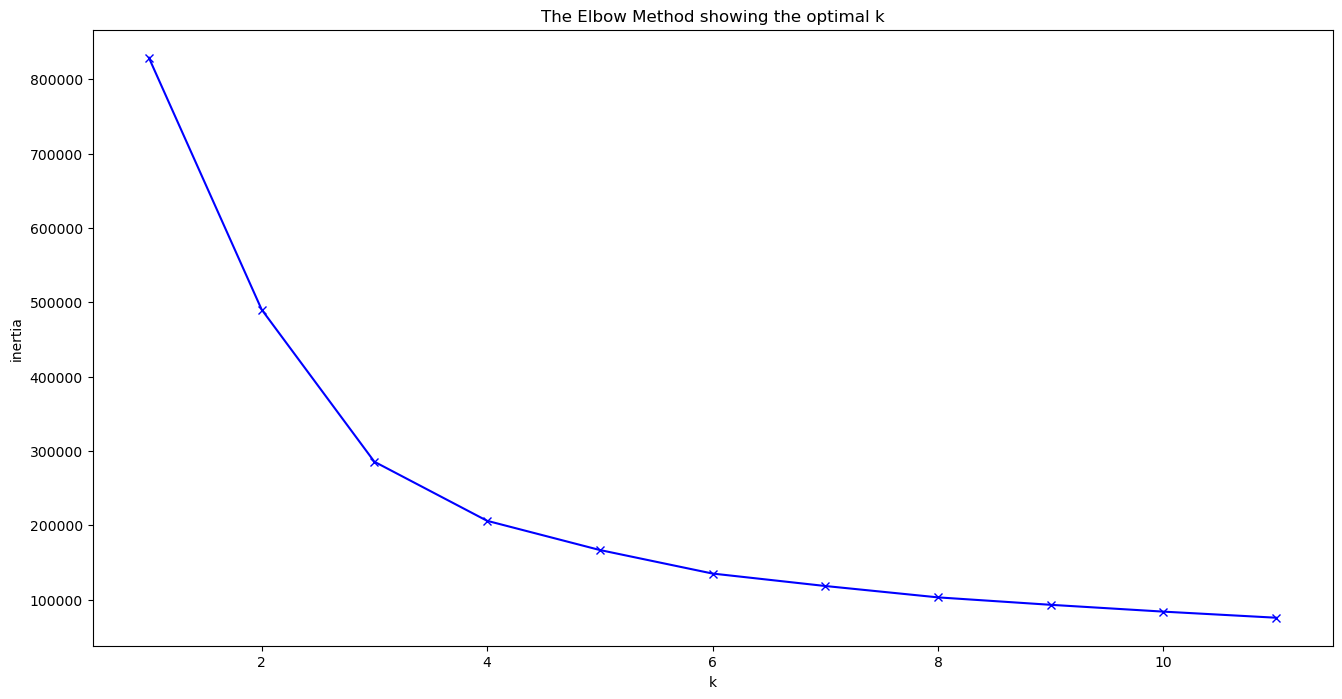

In [78]:
plt.figure(figsize=(16,8))
plt.plot(range(1,12), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [79]:
df

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,dt_min,dt_max,t_days_op,recency_score,frequency_score,monetary_score,score,freq_day
0,8707226,323,1,5.90,5.90,5.90,5.900000,NaN,2020-02-13,2020-02-13,1,1,1,1,3,1.000000
1,8707227,54,3,27.86,4.90,15.09,9.286667,5.240633,2020-01-04,2020-11-08,310,2,2,1,5,0.009677
2,8707229,27,7,162.98,7.53,50.88,23.282857,16.776008,2020-01-03,2020-12-05,338,3,3,3,9,0.020710
4,8707234,75,1,38.67,38.67,38.67,38.670000,NaN,2020-10-18,2020-10-18,1,2,1,1,4,1.000000
5,8707240,2,36,1155.84,3.30,51.14,32.106667,9.299158,2020-01-17,2020-12-30,349,5,5,5,15,0.103152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279902,9371622,8,15,239.27,7.18,32.83,15.951333,7.144198,2020-02-05,2020-12-24,324,4,4,3,11,0.046296
279903,9372140,23,8,129.99,4.40,27.68,16.248750,8.198748,2020-01-04,2020-12-09,341,3,3,2,8,0.023460
279904,9373682,1,13,80.53,1.98,15.64,6.194615,4.150708,2020-11-09,2020-12-31,53,5,3,2,10,0.245283
279905,9376977,300,1,7.29,7.29,7.29,7.290000,NaN,2020-03-07,2020-03-07,1,1,1,1,3,1.000000


Text(0.5, 0.5, 'Frequency')

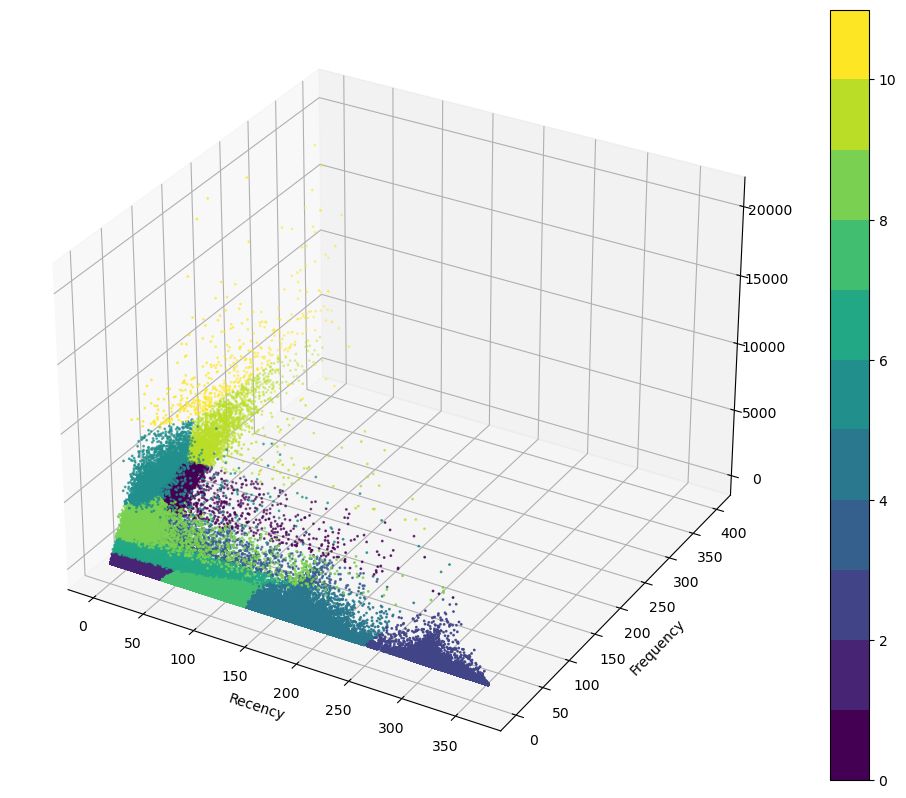

In [80]:
# 11 clusters division
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection = '3d')
bounds = np.array(range(0,12))
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
# pcm = ax[1].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r')
points = ax.scatter(df['recency'], df['frequency'], df['monetary'], s=1, c=y_pred, cmap = 'viridis', norm=norm)
cbar = fig.colorbar(points, orientation='vertical')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')